<a href="https://colab.research.google.com/github/AtharvaAshar/ipcv_pracs/blob/main/ipcvPrac8and9and11ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

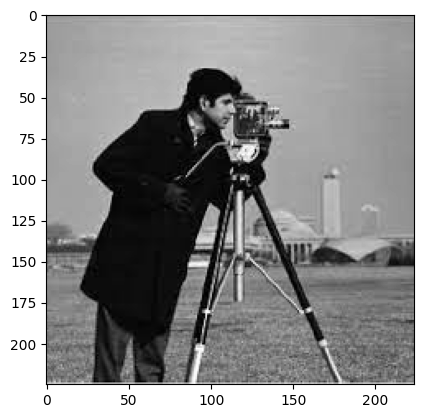

In [ ]:
img = cv2.imread('images.jpeg', 0) 
plt.imshow(img, cmap='gray')

In [ ]:
m, n = img.shape

ideal lpf

In [ ]:
F=np.fft.fft2(img)
F_shift=np.fft.fftshift(F)

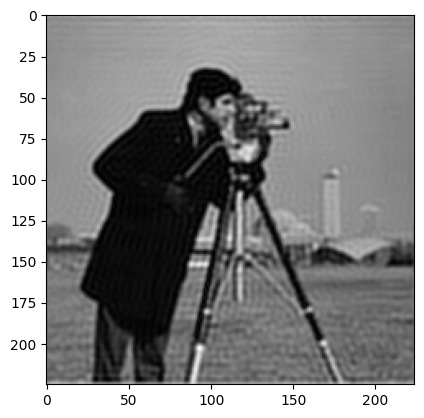

In [ ]:
H=np.zeros((m,n),dtype=np.float32)
D0=50
for u in range(m):
  for v in range(n):
    D=np.sqrt((u-m/2)**2 + (v-n/2)**2)
    if D<=D0:
      H[u][v]=1
    else:
      H[u][v]=0

G_shift=F_shift * H
G=np.fft.ifftshift(G_shift)
g=np.abs(np.fft.ifft2(G))

plt.imshow(g,cmap="gray")

Ideal hpf

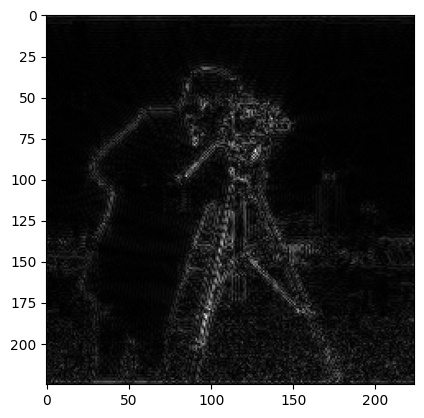

In [ ]:
H=1-H
G_shift=F_shift * H
G=np.fft.ifftshift(G_shift)
g=np.abs(np.fft.ifft2(G))

plt.imshow(g,cmap="gray")

Gaussian LPF

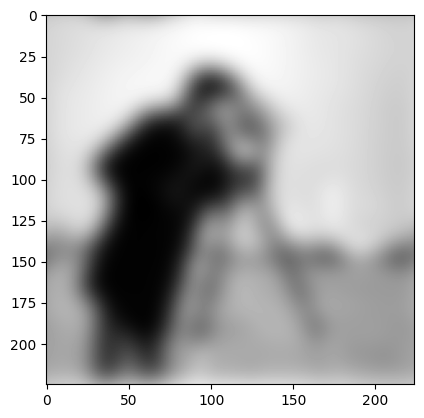

In [ ]:
H=np.zeros((m,n),dtype=np.float32)
D0=50
for u in range(m):
  for v in range(n):
    D=np.sqrt((u-m/2)**2 + (v-n/2)**2)
    H[u][v]=np.exp(-(D **2)/(D0))

G_shift=F_shift*H
G=np.fft.ifftshift(G_shift)
g=np.abs(np.fft.ifft2(G))
plt.imshow(g,cmap="gray")

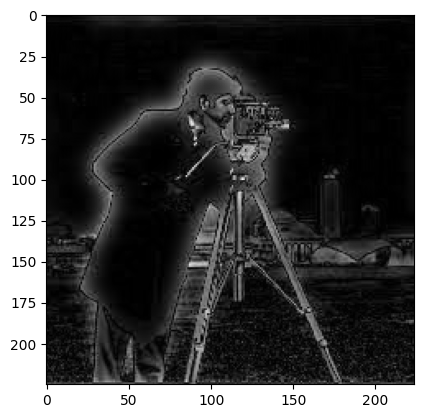

In [ ]:
H=1-H

G_shift=F_shift*H
G=np.fft.ifftshift(G_shift)
g=np.abs(np.fft.ifft2(G))
plt.imshow(g,cmap="gray")

Butterworth LPF

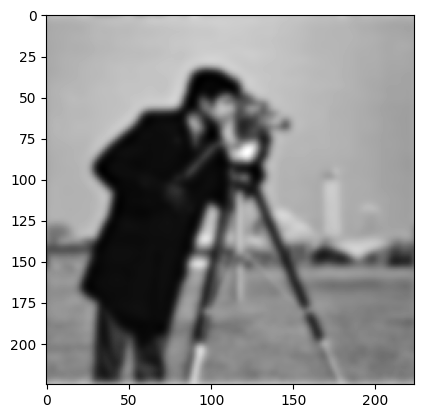

In [ ]:
N=2
D1=20
for u in range(m):
  for v in range(n):
    D = np.sqrt((u-m/2)**2 + (v-n/2)**2)
    power=2*N
    den = (1 + (D/D1)**power)
    H[u][v]=1/den

G_shift=F_shift*H
G= np.fft.ifftshift(G_shift)
g=np.abs(np.fft.ifft2(G))

plt.imshow(g,cmap="gray")

Butterworth hpf

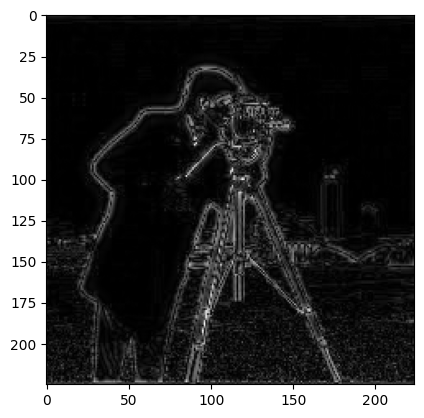

In [ ]:
N=2
D1=20
for u in range(m):
  for v in range(n):
    D = np.sqrt((u-m/2)**2 + (v-n/2)**2)
    power=2*N
    den = (1 + (D1/D)**power)
    H[u][v]=1/den

G_shift=F_shift*H
G= np.fft.ifftshift(G_shift)
g=np.abs(np.fft.ifft2(G))

plt.imshow(g,cmap="gray")